# Multi-layer Perceptron (MLP)

- **Training set**: LO_SARD102 (0.75 split)
- **Test/Validation set:** LO_SARD102 (0.25 split)
- **Features**: word2vec average
- **Class imbalance processing**: None

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from helper_functions import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

/home/scheuererra68323/venv37/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Load labeled dataset

In [2]:
dataset = pd.read_hdf("/mnt/md0/user/scheuererra68323/LO_SARD102/LO_SARD102_word2vec.h5")
print(dataset.shape)
print(dataset.is_vulnerable.value_counts())

(292724, 2)
0.0    269721
1.0     23003
Name: is_vulnerable, dtype: int64


## Split dataset into training and test

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(
    dataset.word2vec_avg,
    dataset.is_vulnerable,
    test_size=0.2,
    stratify=dataset.is_vulnerable,
    random_state=0
)
X_train, X_val, Y_train, Y_val = train_test_split(
    X_train,
    Y_train,
    test_size=0.25,
    stratify=Y_train,
    random_state=1
)

X_train = numpy.stack(X_train, axis=0)
Y_train = numpy.stack(Y_train, axis=0)
X_val = numpy.stack(X_val, axis=0)
Y_val = numpy.stack(Y_val, axis=0)
X_test = numpy.stack(X_test, axis=0)
Y_test = numpy.stack(Y_test, axis=0)

print("Training Set:")
print(f"{len(X_train)} total")
print(Counter(Y_train))
print()      
print("Validation Set:")
print(f"{len(X_val)} total")
print(Counter(Y_val))
print()      
print("Test Set:")
print(f"{len(X_test)} total")
print(Counter(Y_test))

Training Set:
175634 total
Counter({0.0: 161833, 1.0: 13801})

Validation Set:
58545 total
Counter({0.0: 53944, 1.0: 4601})

Test Set:
58545 total
Counter({0.0: 53944, 1.0: 4601})


## Model definition & Training

In [7]:
init_mode = 'glorot_uniform'
hidden_size=64
model = keras.Sequential(
    [
        layers.Dense(hidden_size,
                     input_dim=100,
                     kernel_initializer=init_mode,
                     activation=tf.nn.relu),


        layers.Dropout(0.1),

        layers.Dense(hidden_size,
                     kernel_initializer=init_mode,
                     activation=tf.nn.relu),

        layers.Dense(hidden_size,
                     kernel_initializer=init_mode,
                     activation=tf.nn.relu),


        layers.Dense(1, 
                     kernel_initializer=init_mode, 
                     activation=tf.nn.sigmoid),
    ]
)
model.summary()

model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.SGD(learning_rate=0.1, momentum=0.9, decay=0.001),
              metrics=['accuracy'])
history = model.fit(X_train,
                    Y_train,
                    batch_size=X_train.shape[0],
                    epochs=125,
                    verbose=True,
                    validation_data=(X_val, Y_val))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                6464      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 14,849
Trainable params: 14,849
Non-trainable params: 0
_________________________________________________________________
Train on 175634 samples, validate on 58545 samples
Epoch 1/125
175634/175634 [==============================] - 1s 5

Epoch 48/125
175634/175634 [==============================] - 0s 1us/sample - loss: 0.1323 - accuracy: 0.9469 - val_loss: 0.1271 - val_accuracy: 0.9462
Epoch 49/125
175634/175634 [==============================] - 0s 1us/sample - loss: 0.1300 - accuracy: 0.9469 - val_loss: 0.1259 - val_accuracy: 0.9476
Epoch 50/125
175634/175634 [==============================] - 0s 1us/sample - loss: 0.1288 - accuracy: 0.9473 - val_loss: 0.1244 - val_accuracy: 0.9489
Epoch 51/125
175634/175634 [==============================] - 0s 1us/sample - loss: 0.1279 - accuracy: 0.9482 - val_loss: 0.1221 - val_accuracy: 0.9510
Epoch 52/125
175634/175634 [==============================] - 0s 1us/sample - loss: 0.1256 - accuracy: 0.9495 - val_loss: 0.1198 - val_accuracy: 0.9564
Epoch 53/125
175634/175634 [==============================] - 0s 1us/sample - loss: 0.1231 - accuracy: 0.9513 - val_loss: 0.1182 - val_accuracy: 0.9550
Epoch 54/125
175634/175634 [==============================] - 0s 1us/sample - loss: 0.12

Epoch 102/125
175634/175634 [==============================] - 0s 1us/sample - loss: 0.0727 - accuracy: 0.9777 - val_loss: 0.0687 - val_accuracy: 0.9788
Epoch 103/125
175634/175634 [==============================] - 0s 1us/sample - loss: 0.0726 - accuracy: 0.9781 - val_loss: 0.0682 - val_accuracy: 0.9787
Epoch 104/125
175634/175634 [==============================] - 0s 1us/sample - loss: 0.0723 - accuracy: 0.9782 - val_loss: 0.0678 - val_accuracy: 0.9788
Epoch 105/125
175634/175634 [==============================] - 0s 1us/sample - loss: 0.0718 - accuracy: 0.9783 - val_loss: 0.0674 - val_accuracy: 0.9790
Epoch 106/125
175634/175634 [==============================] - 0s 1us/sample - loss: 0.0716 - accuracy: 0.9784 - val_loss: 0.0671 - val_accuracy: 0.9808
Epoch 107/125
175634/175634 [==============================] - 0s 1us/sample - loss: 0.0709 - accuracy: 0.9786 - val_loss: 0.0668 - val_accuracy: 0.9811
Epoch 108/125
175634/175634 [==============================] - 0s 1us/sample - los

## Evaluation

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     53944
         1.0       0.93      0.83      0.87      4601

    accuracy                           0.98     58545
   macro avg       0.96      0.91      0.93     58545
weighted avg       0.98      0.98      0.98     58545

Confusion matrix:
[[53639   305]
 [  788  3813]]

Confusion matrix (Percentages):
[[91.62   0.521]
 [ 1.346  6.513]]

Metrics:
Sensitivity (TPR): 0.828733
Specifity (TNR):   0.994346

FPR: 0.005654
FNR: 0.171267

Balanced accuracy: 0.911539

Test loss:	0.061316
Test accuracy:	0.981331


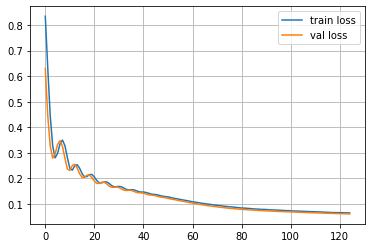

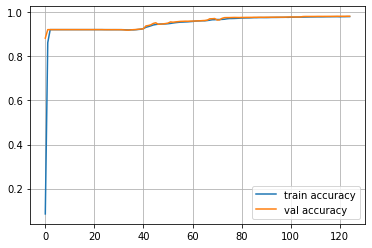

In [8]:
Y_pred = numpy.round(model.predict(X_test))

print(classification_report(Y_test, Y_pred))
print_metrics(confusion_matrix(Y_test, Y_pred), Y_test)
print()
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:\t{:.6f}'.format(score[0]))
print('Test accuracy:\t{:.6f}'.format(score[1]))

plot_loss(history)
plot_accuracy(history)

In [9]:
model.save('MLP_word2vec.h5')